In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("churn.csv")

In [3]:
df.head()

,Unnamed: 0,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book
0,0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39
1,1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44
2,2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36
3,3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34
4,4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21


In [5]:
df.shape

(10127, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
Unnamed: 0         10127 non-null int64
Attrition_Flag     10127 non-null object
Customer_Age       10127 non-null int64
Gender             10127 non-null object
Dependent_count    10127 non-null int64
Education_Level    10127 non-null object
Marital_Status     10127 non-null object
Income_Category    10127 non-null object
Card_Category      10127 non-null object
Months_on_book     10127 non-null int64
dtypes: int64(4), object(6)
memory usage: 791.3+ KB


In [7]:
df.isnull().sum()

Unnamed: 0         0
Attrition_Flag     0
Customer_Age       0
Gender             0
Dependent_count    0
Education_Level    0
Marital_Status     0
Income_Category    0
Card_Category      0
Months_on_book     0
dtype: int64

In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df_cat = df.select_dtypes("object")
df_num = df.select_dtypes("int64")

In [10]:
df_num.head()

,Customer_Age,Dependent_count,Months_on_book
0,45,3,39
1,49,5,44
2,51,3,36
3,40,4,34
4,40,3,21


In [11]:
df_num.describe()

,Customer_Age,Dependent_count,Months_on_book
count,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409
std,8.016814,1.298908,7.986416
min,26.000000,0.000000,13.000000
25%,41.000000,1.000000,31.000000
50%,46.000000,2.000000,36.000000
75%,52.000000,3.000000,40.000000
max,73.000000,5.000000,56.000000


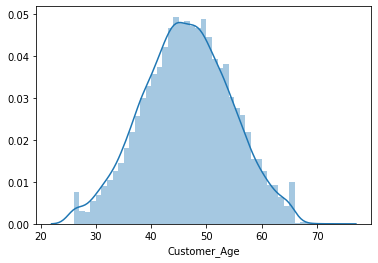

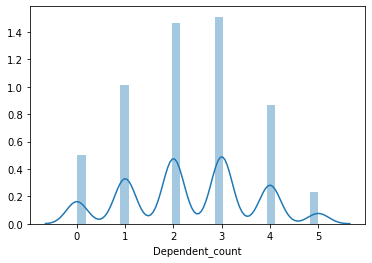

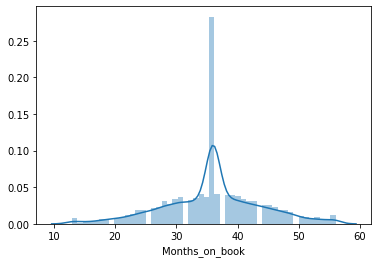

In [12]:
for col in df_num:
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()

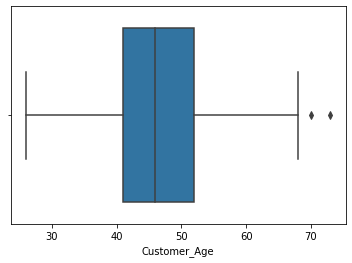

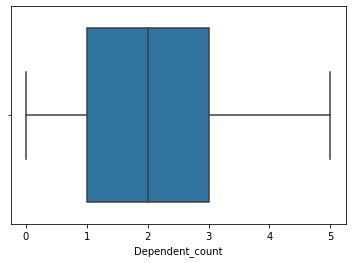

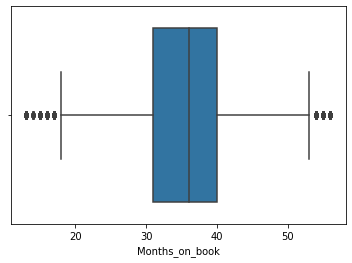

In [13]:
for col in df_num:
  plt.figure()
  sns.boxplot(data=df_num, x=col)
  plt.show()

In [14]:
  df_cat.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


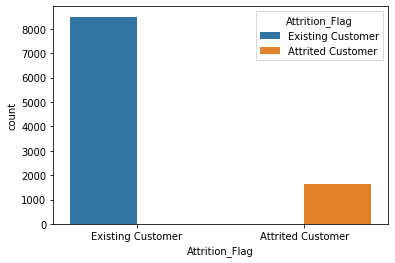

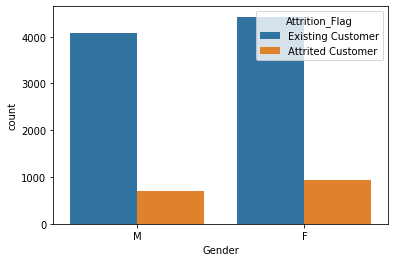

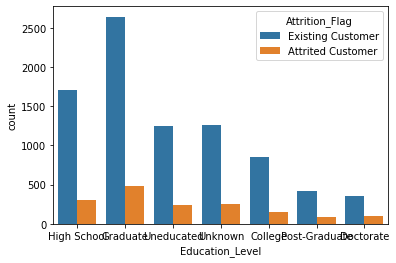

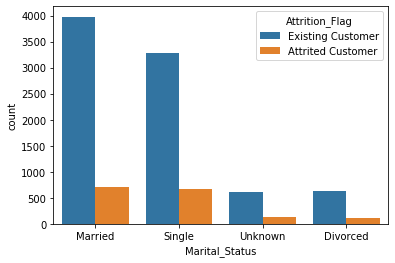

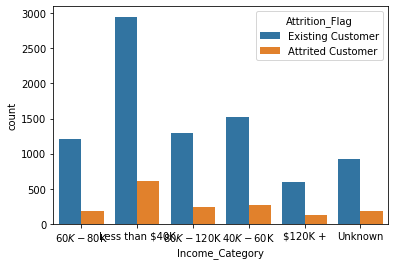

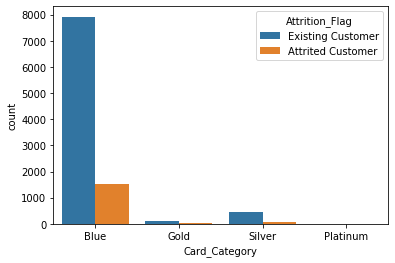

In [15]:
for col in df_cat:
  plt.figure()
  sns.countplot(data=df_cat, x=col, hue="Attrition_Flag")
  plt.show()

In [16]:
y = df_cat["Attrition_Flag"]
df_cat = df_cat.drop("Attrition_Flag", axis=1)

In [17]:
df_cat_encoded = pd.get_dummies(df_cat)

In [18]:
for col in df_num:
  mm = MinMaxScaler()
  df_num[col] = mm.fit_transform(df_num[[col]])

C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [19]:
df_num.head()

,Customer_Age,Dependent_count,Months_on_book
0,0.404255,0.6,0.604651
1,0.489362,1.0,0.720930
2,0.531915,0.6,0.534884
3,0.297872,0.8,0.488372
4,0.297872,0.6,0.186047


In [20]:
X = pd.concat([df_num, df_cat_encoded], axis=1)

In [21]:
le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()

In [27]:
lr.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       488
           1       0.84      1.00      0.91      2551

    accuracy                           0.84      3039
   macro avg       0.42      0.50      0.46      3039
weighted avg       0.70      0.84      0.77      3039



C:\Users\HOME\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# upsampling and downsampling

In [30]:
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [31]:
from imblearn.under_sampling import RandomUnderSampler

C:\Users\HOME\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\HOME\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\HOME\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in ve

In [32]:
rus = RandomUnderSampler(random_state=1)

In [33]:
X_sample1, y_sample1 = rus.fit_sample(X_train,y_train)


C:\Users\HOME\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [34]:
pd.Series(y_sample1).value_counts()

1    1139
0    1139
dtype: int64

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(X_sample1,y_sample1)

LogisticRegression()

In [37]:
y_pred = lr.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.16      0.49      0.24       488
           1       0.84      0.51      0.64      2551

    accuracy                           0.51      3039
   macro avg       0.50      0.50      0.44      3039
weighted avg       0.73      0.51      0.58      3039



In [40]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_sample2, y_sample2 = ros.fit_sample(X_train,y_train)

C:\Users\HOME\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [41]:
lr = LogisticRegression()
lr.fit(X_sample2,y_sample2)

LogisticRegression()

In [42]:
y_pred = lr.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.17      0.49      0.25       488
           1       0.84      0.53      0.65      2551

    accuracy                           0.52      3039
   macro avg       0.51      0.51      0.45      3039
weighted avg       0.74      0.52      0.58      3039

